In [1]:
import warnings
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import acquire as a
import prepare as p
import explore as e
import model as m

In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
readme_df = a.acquire_readmes()
readme_df = p.prep_df_for_nlp(readme_df,'readme_contents')


In [6]:
train, validate, test = p.split_data(readme_df,'language')

In [94]:
from sklearn.preprocessing import MinMaxScaler


reload(m)
# encode_has_language
train_x = m.encode_has_language(train)
valid_x = m.encode_has_language(validate)
#scale lemmatized_len
scaler = MinMaxScaler()
scaled_valid = m.scale(validate.lemmatized_len,scaler)
scaled_train = m.scale(train.lemmatized_len,scaler)
#concat scaled_train and encoded_has_language
train_x = pd.concat([scaled_train,train_x],axis=1)
train_y = train.language
valid_x = pd.concat([scaled_valid,valid_x],axis=1)
valid_y = validate.language


In [95]:
rf_train, rf_valid = m.tune_random_forest(train_x,train_y,valid_x,valid_y,max_depth=(2,31,1))

fig,axs = plt.subplots(2,1,figsize=(10,20),sharex=True)

sns.heatmap(rf_train,ax=axs[0])
axs[0].set_title('In sample Data')
sns.heatmap(rf_valid,ax=axs[1])
axs[1].set_title('Out of sample data')
plt.show()


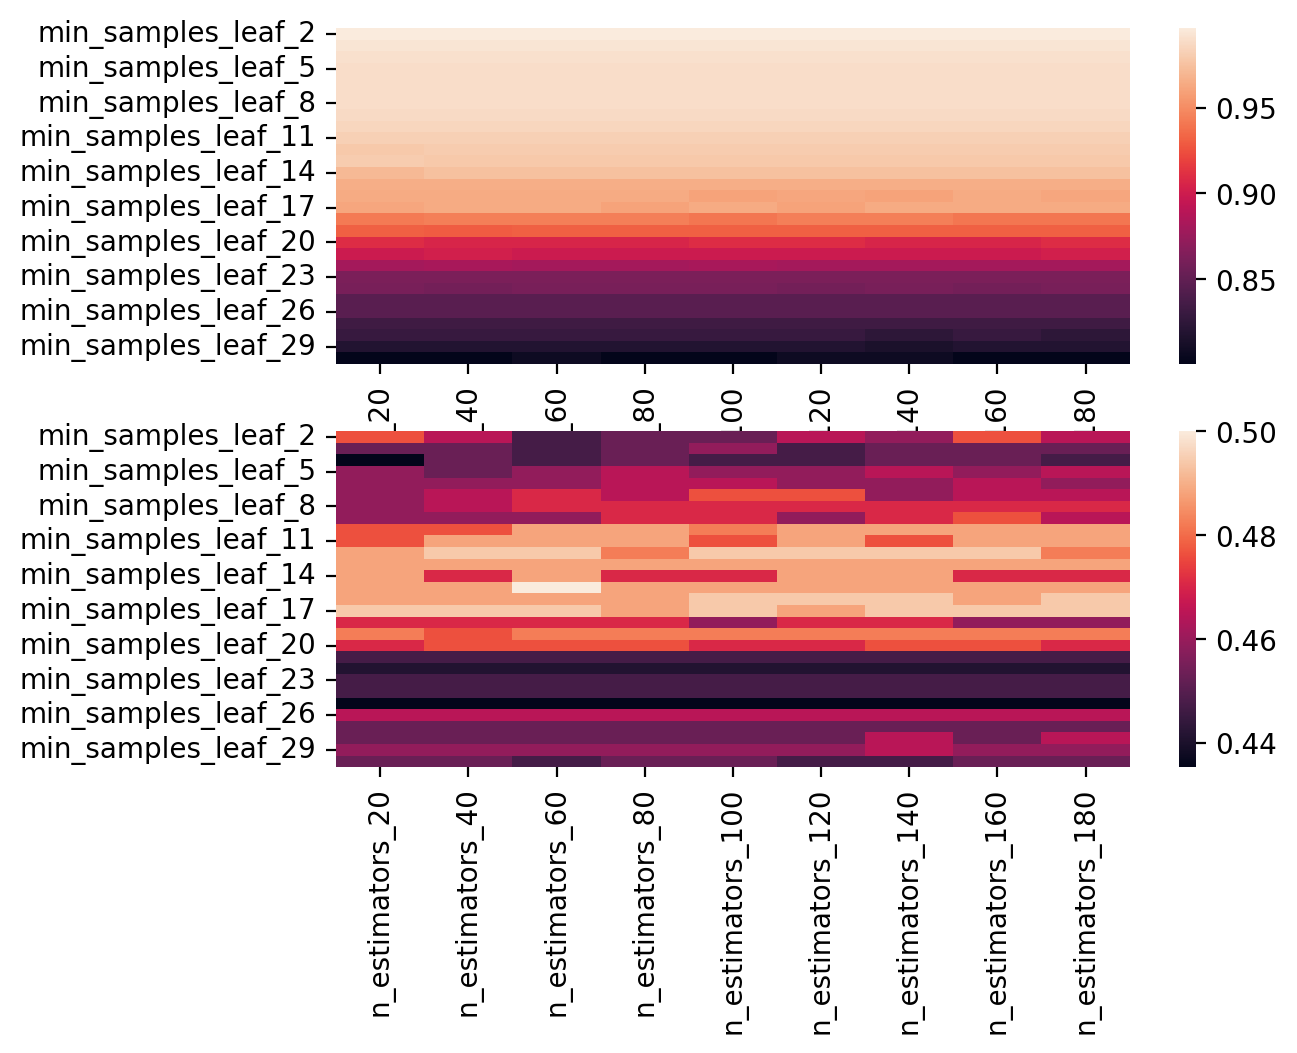

In [86]:
reload(m)
xg_train,xg_valid = m.tune_gradient_boost(train_x,train_y,valid_x,valid_y)


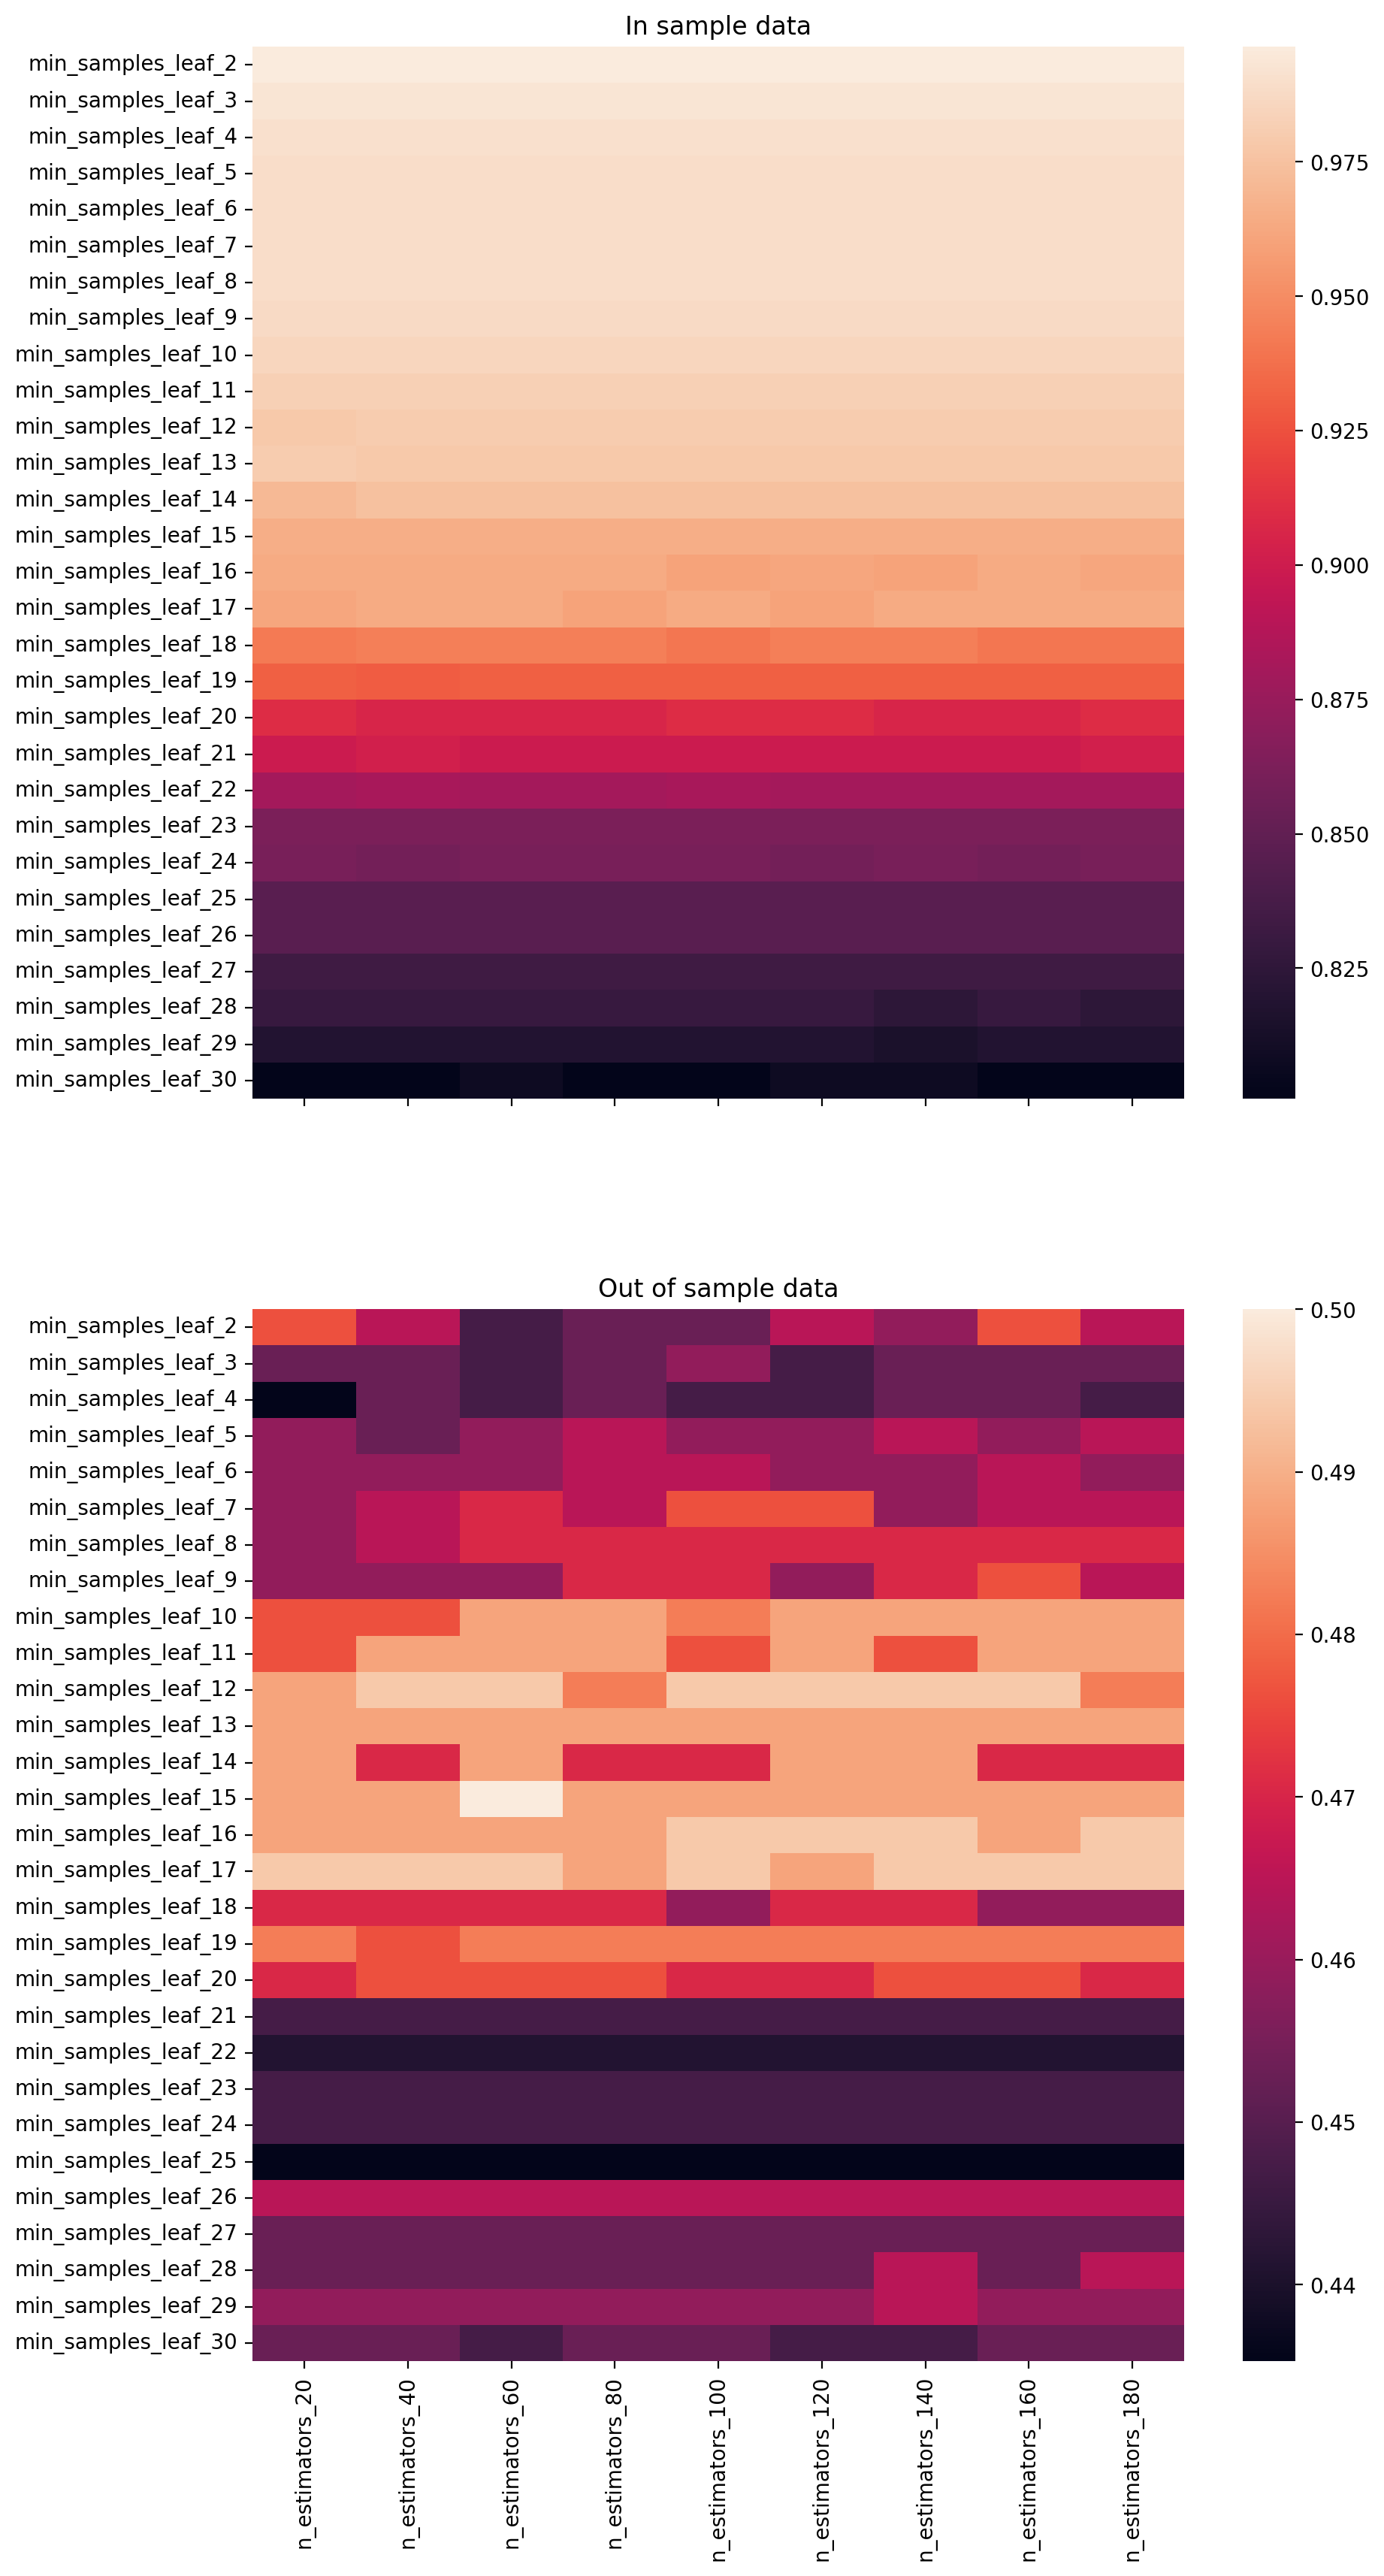

In [93]:
fig,axs = plt.subplots(2,1,figsize=(10,20),sharex=True)
sns.heatmap(xg_train,ax=axs[0])
axs[0].set_title('In sample data')
sns.heatmap(xg_valid,ax=axs[1])
axs[1].set_title('Out of sample data')
plt.show()